# Momentos del dia VS Duración de los viajes



## Cantidad de viajes por cada horario del día

###### Se verifica la cantidad de viajes durante el día para luego calcular los promedios mas precisamente y no ser victima de la ecuación malefica e innombrable

In [1]:
from root import *
import numpy as np


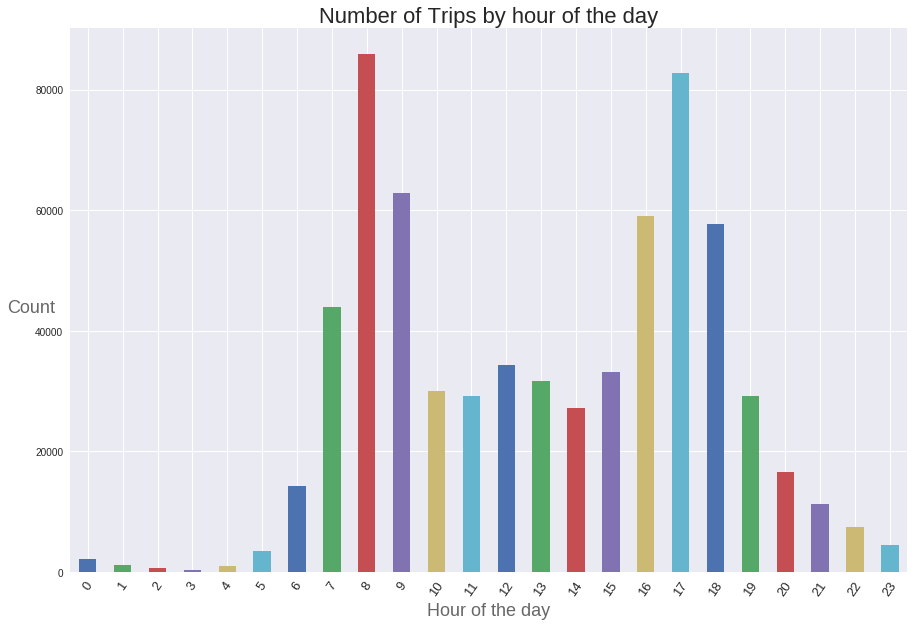

In [2]:
dfTripReduced2 = dfTrip
dfTripReduced2['hour'] = dfTripReduced2.apply(lambda x: x.start_date.hour, axis=1)
dfTripReduced2 = dfTripReduced2.sort_values(by=['hour']).groupby(by=['hour']).agg('count').reset_index()[['hour', 'duration']]
dfTripReduced2 = dfTripReduced2[['hour', 'duration']].rename(columns={'duration': 'count'})

ax = dfTripReduced2.plot(kind='bar', x='hour', y='count', color=sns.color_palette(), legend=False)
ax.figure.set_size_inches(15, 10)

sns.despine()
ax.set_title('Number of Trips by hour of the day', size=22)
ax.set_xlabel('Hour of the day', size=18, alpha=0.7)
ax.set_ylabel('Count', size=18, rotation='horizontal', position=(0, 0.47), alpha=0.7)
plt.xticks(rotation=55, size=13)
plt.show()


## Calculo de promedio de duración de los viajes de acuerdo a momento del día

##### Debido a que la cantidad de viajes durante la madrugada (entre las 0 hs y las 4 hs) es menor, es probable  que los promedios de duración sean muy altos o bajos de acuerdo al caso, por lo que se descartan estos datos para el cálculo de promedios. 



In [3]:
def getMomentOfDay(x):
    if x.start_date.hour < 5:
        return #Descarto los viajes durante la mañana ya que su promedio puede ser engañoso por ser un horario de muy bajo porcentaje de alquileres
    if  5 <= x.start_date.hour < 12:
        return 'Morning'
    if 12 <= x.start_date.hour < 13:
        return 'Noon'
    if 13 <= x.start_date.hour < 18:
        return 'Afternoon'
    if 18 <= x.start_date.hour < 21:
        return 'Evening'
    if 21 <= x.start_date.hour <= 23:
        return 'Night'


/home/ralvarado/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


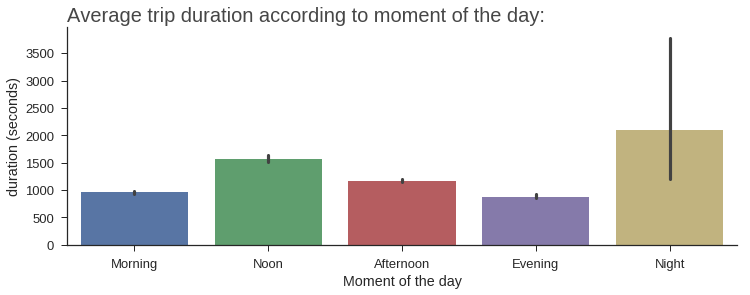

In [4]:
dfTripReduced = dfTrip[['start_date', 'duration']]
dfTripReduced['moment_of_day'] =  dfTripReduced.apply(getMomentOfDay, axis=1)
dfTripReduced.sort_values(by=['start_date'])\
        .groupby(by=['moment_of_day'])\
        .agg('mean').reset_index()
        
plt.figure(figsize=(12,4))

sns.set(font_scale=1.30)
sns.set_style('ticks')

bars = sns.barplot(y='duration',\
                   x='moment_of_day',\
                   order=['Morning', 'Noon', 'Afternoon', 'Evening', 'Night'],\
                   data=dfTripReduced)

sns.despine()

bars.set(ylabel='duration (seconds)',\
         xlabel='Moment of the day');

bars.set_title('Average trip duration according to moment of the day:', size=20, loc='left', alpha=0.85);
plt.show()

In [5]:
dfTripReduced['hour'] = dfTripReduced['start_date'].apply(lambda x: x.hour)

/home/ralvarado/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [6]:
dfMerged = dfTripReduced.merge(dfTripReduced2, on='hour')
dfMerged

,start_date,duration,moment_of_day,hour,count
0,2013-08-29 14:13:00,63,Afternoon,14,27156
1,2013-08-29 14:42:00,70,Afternoon,14,27156
2,2013-08-29 14:02:00,111,Afternoon,14,27156
3,2013-08-29 14:38:00,191,Afternoon,14,27156
4,2013-08-29 14:30:00,239,Afternoon,14,27156
5,2013-08-29 14:17:00,262,Afternoon,14,27156
6,2013-08-29 14:31:00,265,Afternoon,14,27156
7,2013-08-29 14:31:00,288,Afternoon,14,27156
8,2013-08-29 14:33:00,291,Afternoon,14,27156
9,2013-08-29 14:34:00,323,Afternoon,14,27156


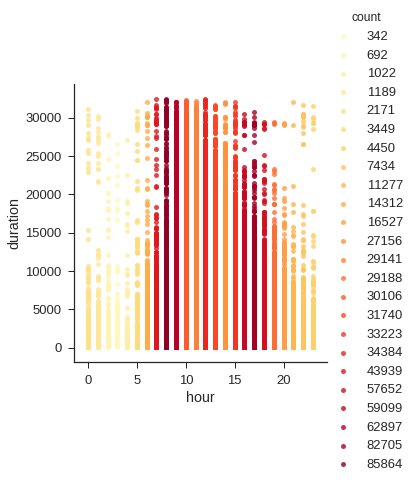

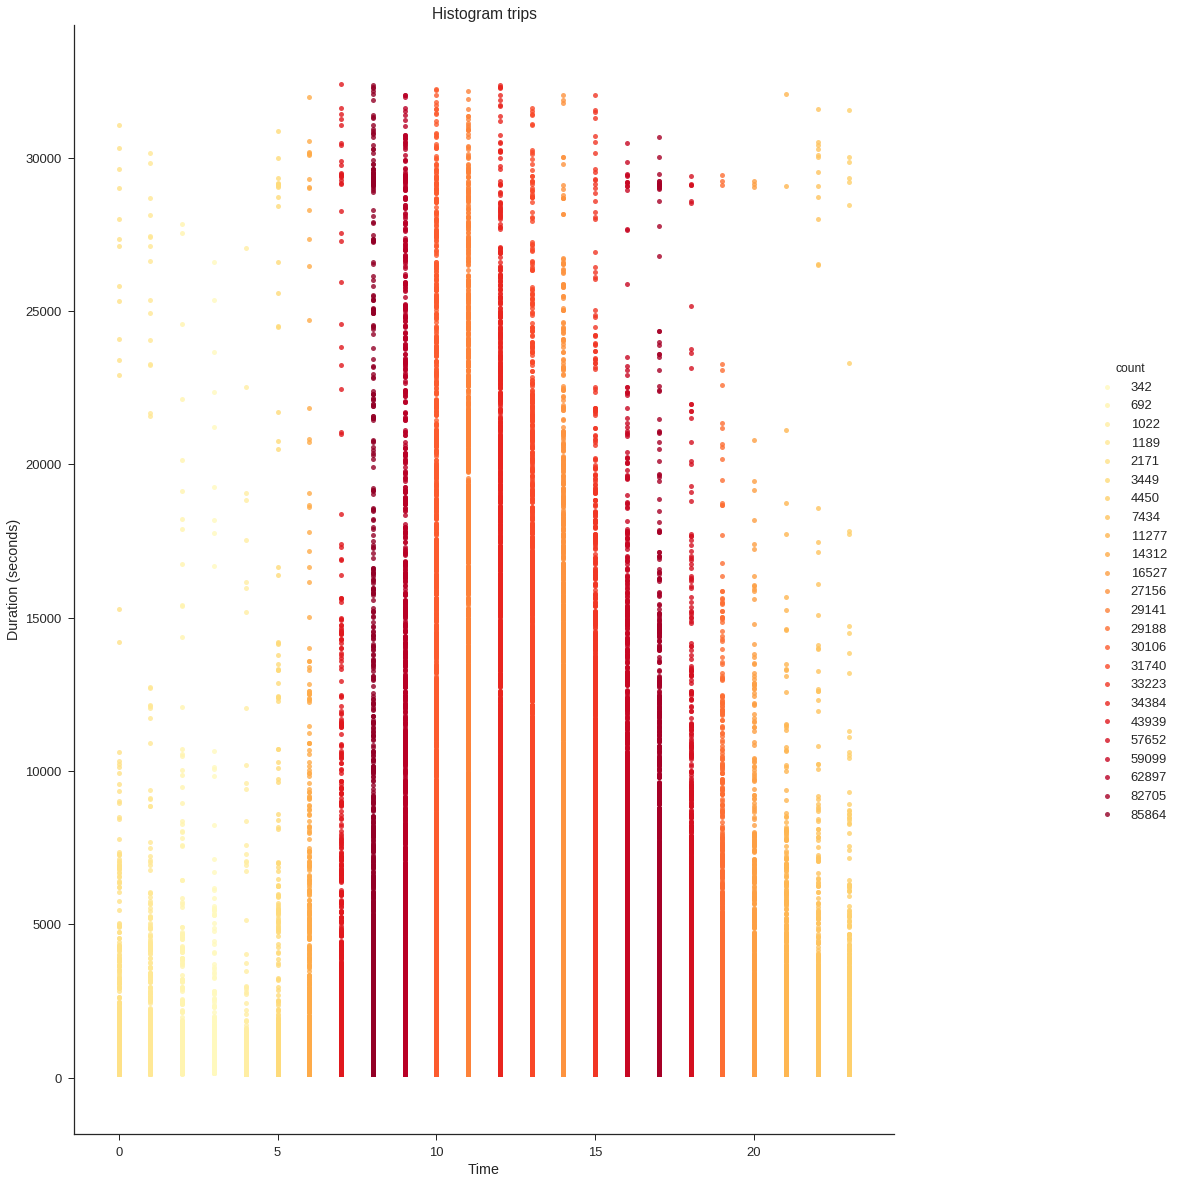

In [8]:
plt.figure(figsize=(4,4))

sns.set(font_scale=1.30)
sns.set_style("ticks")

graf = sns.lmplot(x='hour', y='duration',
           data=dfMerged[ (60*2 <= dfMerged.duration) & (dfMerged.duration <= 9*3600) ],
           fit_reg=False,
           hue="count",
           palette="YlOrRd",
           scatter_kws={"s":25}
          )
graf.fig.set_size_inches(20, 20)
           
plt.title('Histogram trips')
plt.xlabel('Time')
plt.ylabel('Duration (seconds)')
plt.show()
